<h1 style="color: #492c68;">01 | PREPROCESSING</h1>

<h2 style="color: #327a81;">Libraries</h2>

In [1]:
## Basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #327a81;">Data Standardization</h2>

In [2]:
data = pd.read_csv("vgchartz-2024.csv")

In [3]:
data.head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
data.shape

(64016, 14)

In [5]:
data.dtypes

img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object

In [6]:
df = data.copy()

<h3 style="color: #60b671;">Nulls</h3>

In [7]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [77]:
print(f"critic_score has a {round(57338/64016*100, 2)} percent of nulls with respect to the total dataset")
print(f"total_sales has a {round(45094/64016*100, 2)} percent of nulls with respect to the total dataset")
print(f"na_sales has a {round(51379/64016*100, 2)} percent of nulls with respect to the total dataset")
print(f"jp_sales has a {round(57290/64016*100, 2)} percent of nulls with respect to the total dataset")
print(f"pal_sales has a {round(51192/64016*100, 2)} percent of nulls with respect to the total dataset")
print(f"other_sales has a {round(48888/64016*100, 2)} percent of nulls with respect to the total dataset")
print(f"release_date has a {round(7051/64016*100, 2)} percent of nulls with respect to the total dataset")
print(f"last_update has a {round(46137/64016*100, 2)} percent of nulls with respect to the total dataset")

critic_score has a 89.57 percent of nulls with respect to the total dataset
total_sales has a 70.44 percent of nulls with respect to the total dataset
na_sales has a 80.26 percent of nulls with respect to the total dataset
jp_sales has a 89.49 percent of nulls with respect to the total dataset
pal_sales has a 79.97 percent of nulls with respect to the total dataset
other_sales has a 76.37 percent of nulls with respect to the total dataset
release_date has a 11.01 percent of nulls with respect to the total dataset
last_update has a 72.07 percent of nulls with respect to the total dataset


<h3 style="color: #60b671;">Duplicates</h3>

In [8]:
df.duplicated().sum()

0

<h3 style="color: #60b671;">Dealing with Dates</h3>

In [9]:
df[["release_date", "last_update"]] = df[["release_date", "last_update"]].apply(pd.to_datetime)

In [10]:
df[["release_date", "last_update"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  56965 non-null  datetime64[ns]
 1   last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1000.4 KB


<h3 style="color: #60b671;">Removing unused columns</h3>

In [11]:
df.drop(columns="img", inplace=True)

<h1 style="color: #492c68;">01 | EDA</h1>

In [12]:
# Check in columns

df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [13]:
# Print min/max dates to know period of time

print(df["release_date"].min())
print(df["release_date"].max())

1971-12-03 00:00:00
2024-12-31 00:00:00


<h2 style="color: #327a81;">Categorical. Unique Values</h2>

In [14]:
# Console names

consoles = df["console"].unique()
print(f"Gaming dispositives: {consoles}")

Gaming dispositives: ['PS3' 'PS4' 'PS2' 'X360' 'XOne' 'PC' 'PSP' 'Wii' 'PS' 'DS' '2600' 'GBA'
 'NES' 'XB' 'PSN' 'GEN' 'PSV' 'DC' 'N64' 'SAT' 'SNES' 'GBC' 'GC' 'NS'
 '3DS' 'GB' 'WiiU' 'WS' 'VC' 'NG' 'WW' 'SCD' 'PCE' 'XBL' '3DO' 'GG' 'OSX'
 'Mob' 'PCFX' 'Series' 'All' 'iOS' '5200' 'And' 'DSiW' 'Lynx' 'Linux' 'MS'
 'ZXS' 'ACPC' 'Amig' '7800' 'DSi' 'AJ' 'WinP' 'iQue' 'GIZ' 'VB' 'Ouya'
 'NGage' 'AST' 'MSD' 'S32X' 'XS' 'PS5' 'Int' 'CV' 'Arc' 'C64' 'FDS' 'MSX'
 'OR' 'C128' 'CDi' 'CD32' 'BRW' 'FMT' 'ApII' 'Aco' 'BBCM' 'TG16']


In [78]:
# Genre types

genres = df["genre"].unique()
print(f"Genres: {genres}")

Genres: ['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Role-Playing'
 'Simulation' 'Racing' 'Music' 'Misc' 'Fighting' 'Platform' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Education' 'Board Game'
 'Visual Novel']


In [16]:
# Publisher names

n_publishers = df["publisher"].nunique()
print(f"Number of publisher companies: {n_publishers}")

Number of publisher companies: 3383


In [17]:
n_developers = df["developer"].nunique()
print(f"Number of developers: {n_developers}")

Number of developers: 8862


<h2 style="color: #327a81;">Numerical. Distributions</h2>

In [18]:
numerical_columns = df.select_dtypes("float")

<Figure size 1600x800 with 0 Axes>

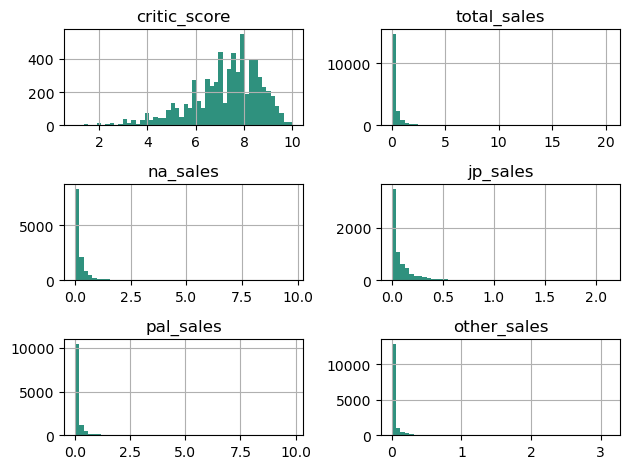

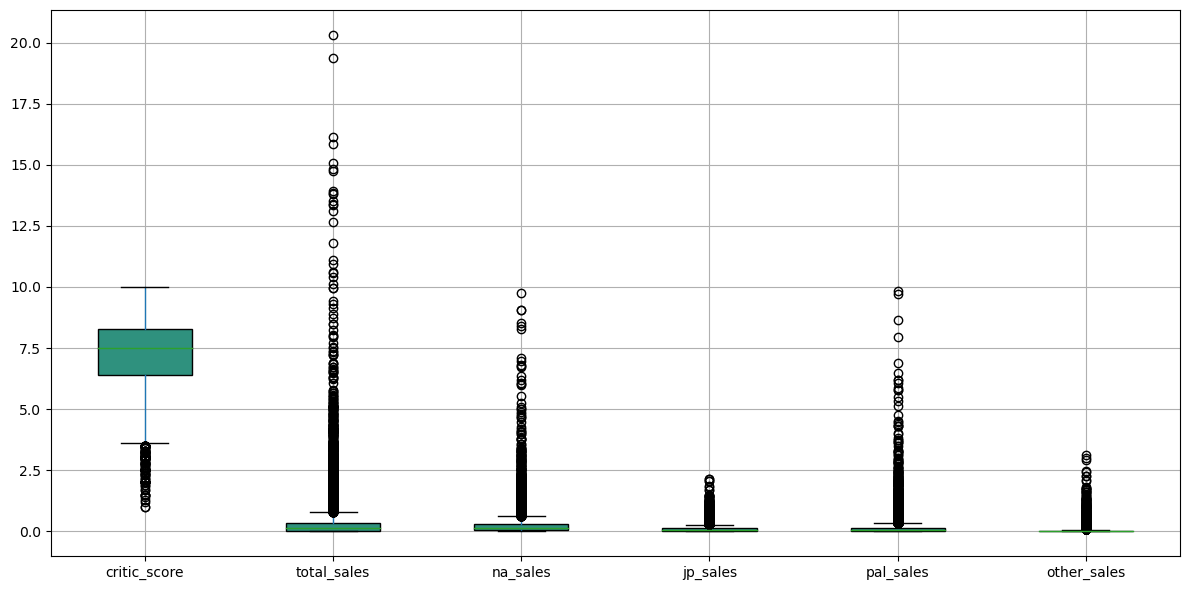

In [19]:
plt.figure(figsize=(16,8))
numerical_columns.hist(bins=50, color= "#2f917e")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
numerical_columns.boxplot(patch_artist=True, boxprops=dict(facecolor="#2f917e"))
plt.tight_layout()
plt.show()

<h2 style="color: #327a81;">Video-Game Sales</h2>

<h3 style="color: #60b671;">Video-Games Total Sales Histogram</h3>

In [20]:
history_sales = df.groupby("release_date")["total_sales"].sum()

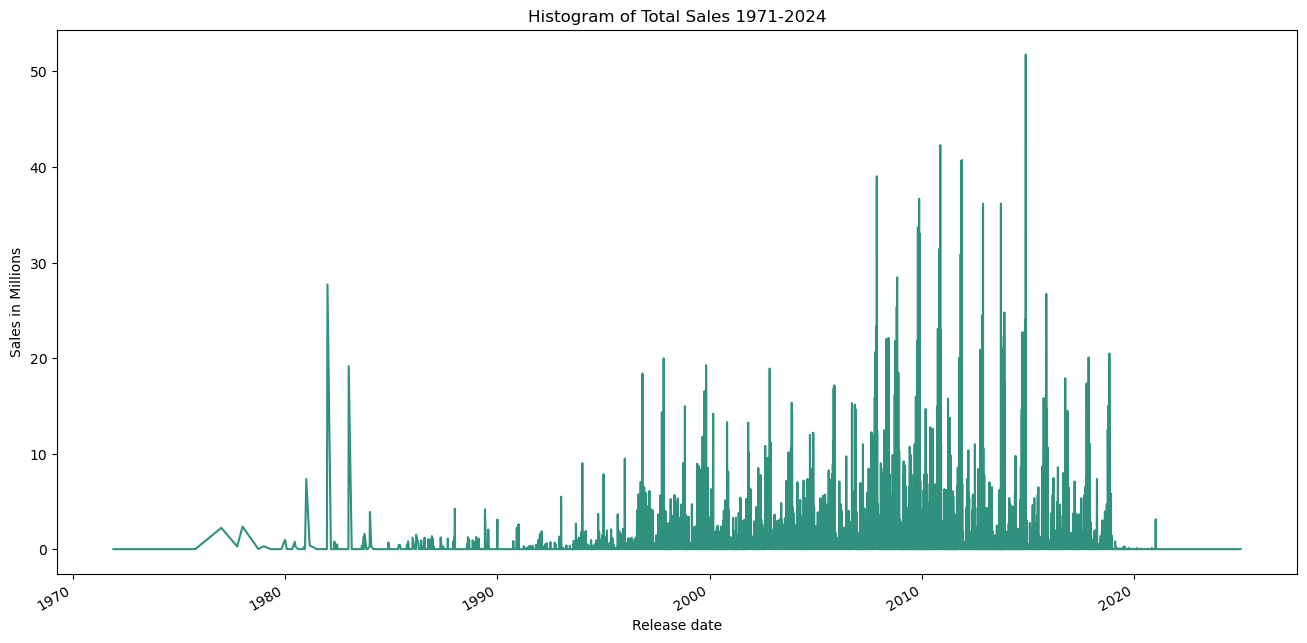

In [21]:
plt.figure(figsize=(16,8))
history_sales.plot(linewidth=1.5, color= "#2f917e")
plt.xlabel("Release date")
plt.ylabel("Sales in Millions")
plt.title("Histogram of Total Sales 1971-2024")
plt.show()

<h3 style="color: #60b671;">Best-selling titles</h3>

In [22]:
titles_genres = df.groupby(["title","genre"])
top_titles = titles_genres["total_sales"].sum().sort_values(ascending=False).head(20)
top_titles = top_titles.reset_index()

In [23]:
top_titles

,title,genre,total_sales
0,Grand Theft Auto V,Action,64.29
1,Call of Duty: Black Ops,Shooter,30.99
2,Call of Duty: Modern Warfare 3,Shooter,30.71
3,Call of Duty: Black Ops II,Shooter,29.59
4,Call of Duty: Ghosts,Shooter,28.80
5,Call of Duty: Black Ops 3,Shooter,26.72
6,Call of Duty: Modern Warfare 2,Shooter,25.02
7,Grand Theft Auto IV,Action,22.53
8,Minecraft,Misc,22.12
9,Call of Duty: Advanced Warfare,Shooter,21.78


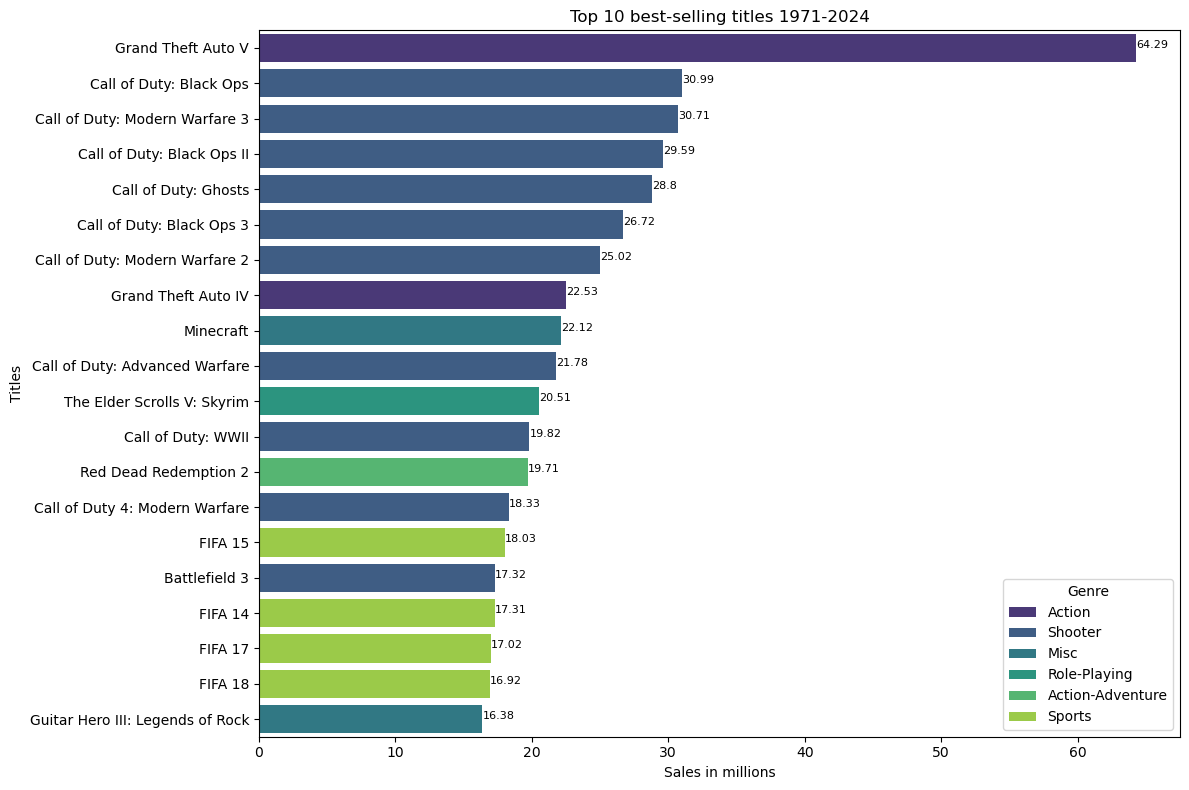

In [24]:
plt.figure(figsize=(12, 8))
best_titles = sns.barplot(data=top_titles, x="total_sales", y="title", hue="genre", palette="viridis", 
            orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
            order=top_titles.sort_values('total_sales', ascending=False)['title'], linewidth=2)
plt.xlabel("Sales in millions")
plt.ylabel("Titles")
plt.title("Top 10 best-selling titles 1971-2024")
plt.legend(title="Genre")

for index, value in enumerate(top_titles["total_sales"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=8)

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Top-Seller Platforms</h3>

In [25]:
# Lets group up the total sales by "console" to know which are the top seller platforms

top_platforms = df.groupby("console")["total_sales"].sum()

In [26]:
top_platforms = top_platforms.reset_index()

In [27]:
top_platforms.sort_values(by="total_sales", ascending=False, inplace=True)

In [28]:
top_platforms = top_platforms.head(20)
top_platforms

,console,total_sales
53,PS2,1027.76
73,X360,859.79
54,PS3,839.70
52,PS,546.25
55,PS4,539.92
70,Wii,459.44
22,DS,458.17
76,XOne,268.96
58,PSP,245.29
74,XB,232.05


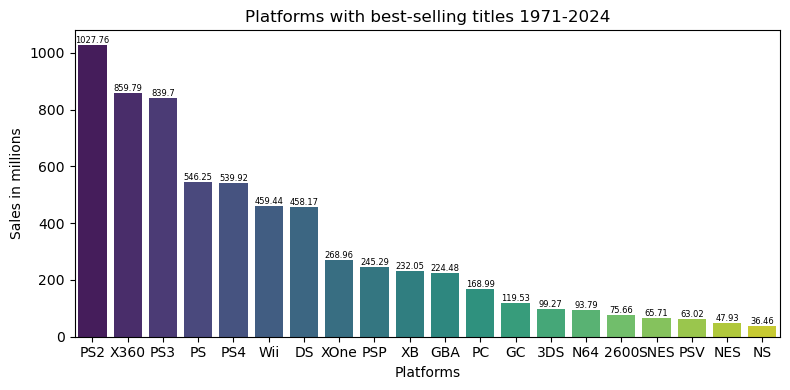

In [29]:
plt.figure(figsize=(8, 4))
platforms_sales = sns.barplot(data=top_platforms, x="console", y="total_sales", palette="viridis")
plt.xlabel("Platforms")
plt.ylabel("Sales in millions")
plt.title("Platforms with best-selling titles 1971-2024")

for index, value in enumerate(top_platforms["total_sales"]):
    plt.text(index, value, str(round(value, 2)), va='bottom', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Sales History by Top-Seller Platforms</h3>

In [30]:
top_consoles = df[df["console"].isin(["PS2", "X360", "PS3", "PS","PS4","Wii","DS","XOne","PSP","XB"])]

In [31]:
top_consoles_sales = top_consoles.pivot_table(index="release_date", columns="console", values="total_sales")

In [32]:
top_consoles_sales.dropna(how="all", inplace=True)

In [33]:
top_consoles_sales.head(3)

console,DS,PS,PS2,PS3,PS4,PSP,Wii,X360,XB,XOne
release_date,,,,,,,,,,
1994-12-03,NaN,0.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-16,NaN,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-22,NaN,0.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
top_consoles_sales_year = top_consoles_sales.resample("Y").sum()

In [35]:
top_consoles_sales_year = top_consoles_sales_year.reset_index()

In [36]:
top_consoles_sales_year.head(3)

console,release_date,DS,PS,PS2,PS3,PS4,PSP,Wii,X360,XB,XOne
0,1994-12-31,0.0,0.355000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1995-12-31,0.0,13.090714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1996-12-31,0.0,29.370471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


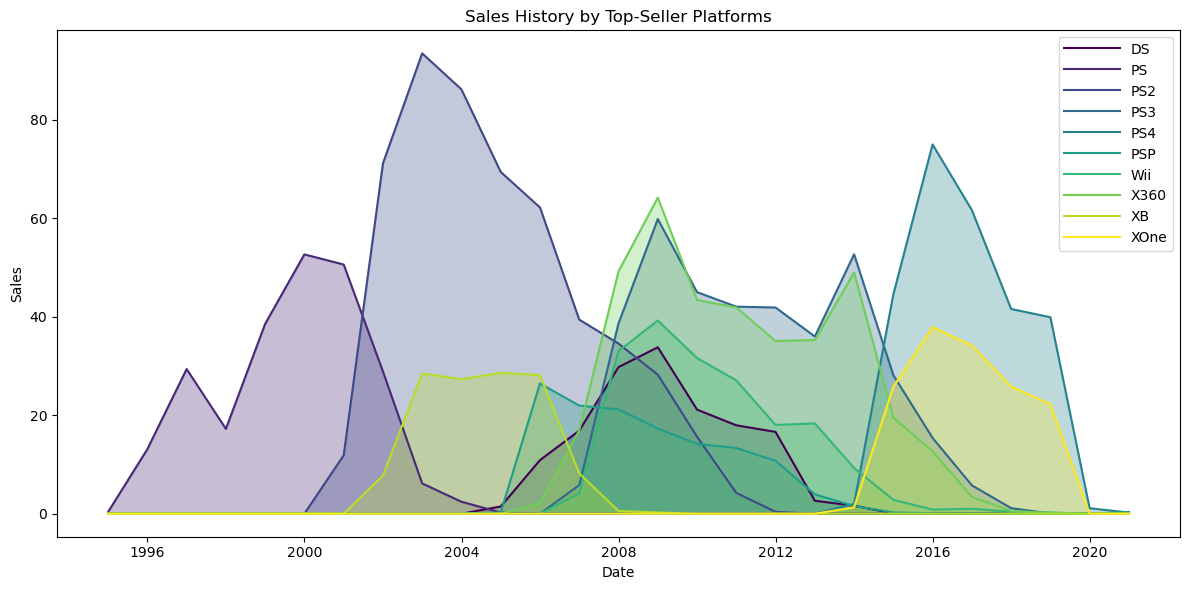

In [37]:
colors = plt.cm.viridis(np.linspace(0, 1, len(top_consoles_sales_year.columns[1:])))

plt.figure(figsize=(12,6))

for i, column in enumerate(top_consoles_sales_year.columns[1:]):
    plt.plot(top_consoles_sales_year["release_date"], top_consoles_sales_year[column], label=column, color=colors[i])
    plt.fill_between(top_consoles_sales_year["release_date"], top_consoles_sales_year[column], color=colors[i], alpha=0.3)
plt.title("Sales History by Top-Seller Platforms")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(handlelength=4, handleheight=1)

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Sales by Genre</h3>

In [38]:
# We can obtain public's favourite genre thanks to the total sales variable

top_genres = df.groupby("genre")["total_sales"].sum().sort_values(ascending=False)

In [39]:
top_genres = top_genres.reset_index().head(10)
top_genres

,genre,total_sales
0,Sports,1187.51
1,Action,1125.89
2,Shooter,995.50
3,Misc,557.79
4,Racing,525.75
5,Role-Playing,426.80
6,Platform,349.15
7,Fighting,341.13
8,Adventure,325.39
9,Simulation,300.65


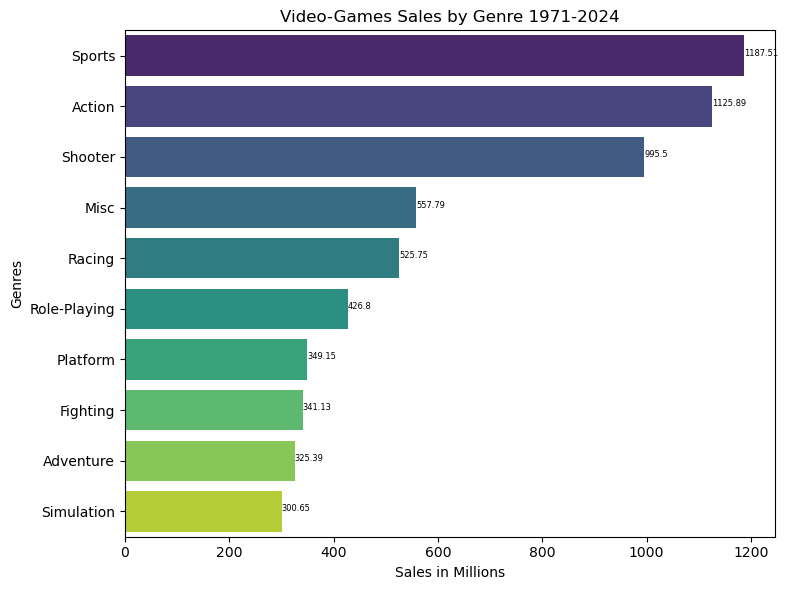

In [40]:
plt.figure(figsize=(8, 6))
genres_sales = sns.barplot(data=top_genres, x="total_sales", y="genre", palette="viridis", 
                           orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
                           order=top_genres.sort_values('total_sales', ascending=False)['genre'], linewidth=2)
plt.xlabel("Sales in Millions")
plt.ylabel("Genres")
plt.title("Video-Games Sales by Genre 1971-2024")

for index, value in enumerate(top_genres["total_sales"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=6)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Most Purchased Title by Genre</h3>

In [41]:
# Let's use the genre's array obtained before to iterate on it and find the most seller title per genre

genres_list = list(genres)
title_genre_sales = pd.DataFrame()

for genre in genres_list:
    genre_title = df[df["genre"] == genre]
    title_x_genre = genre_title.groupby(["title", "genre"])["total_sales"].sum().sort_values(ascending=False).head(1)
    title_x_genre = title_x_genre.reset_index()
    title_genre_sales = pd.concat([title_genre_sales, title_x_genre])
print(title_genre_sales)

                                         title             genre  total_sales
0                           Grand Theft Auto V            Action        64.29
0                      Call of Duty: Black Ops           Shooter        30.99
0                        Red Dead Redemption 2  Action-Adventure        19.71
0                                      FIFA 15            Sports        18.03
0                  The Elder Scrolls V: Skyrim      Role-Playing        20.51
0                                   The Sims 3        Simulation        15.20
0                 Need for Speed Underground 2            Racing        10.95
0                                 Just Dance 4             Music         8.93
0                                    Minecraft              Misc        22.12
0                    WWE SmackDown vs Raw 2008          Fighting         7.39
0         Crash Bandicoot: The Wrath of Cortex          Platform         7.24
0                   LEGO Batman: The Videogame         Adventure

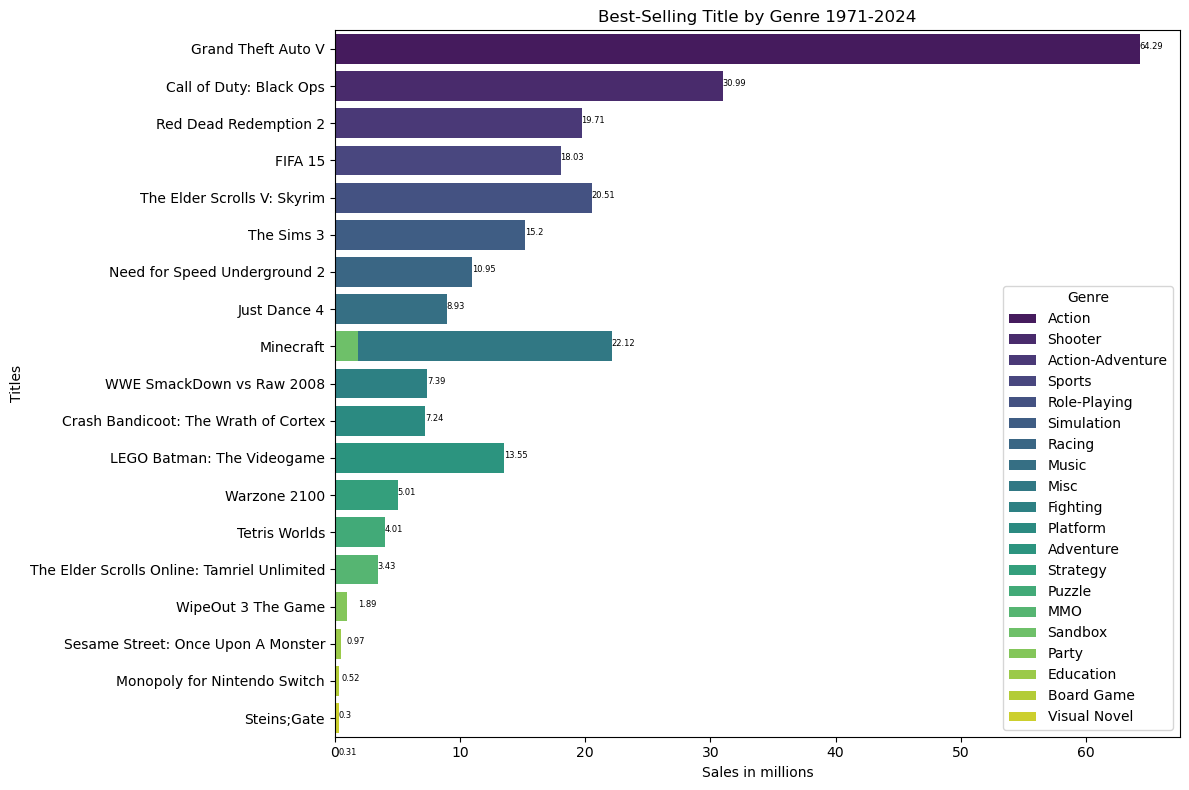

In [42]:
plt.figure(figsize=(12, 8))
title_genre_plot = sns.barplot(data=title_genre_sales, x="total_sales", y="title", hue="genre", palette="viridis", 
            orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum)
plt.xlabel("Sales in millions")
plt.ylabel("Titles")
plt.title("Best-Selling Title by Genre 1971-2024")
plt.legend(title="Genre")

for index, value in enumerate(title_genre_sales["total_sales"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=6)

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Worldwide Sales Distribution</h3>

In [43]:
# We have data about the sales per region, so we can check which is the region with more sales historically 

sales_distribution = df[["na_sales", "jp_sales", "pal_sales", "other_sales"]]

In [44]:
distribution_describe = sales_distribution.describe().T

In [45]:
distribution_describe

,count,mean,std,min,25%,50%,75%,max
na_sales,12637.0,0.264740,0.494787,0.0,0.05,0.12,0.28,9.76
jp_sales,6726.0,0.102281,0.168811,0.0,0.02,0.04,0.12,2.13
pal_sales,12824.0,0.149472,0.392653,0.0,0.01,0.04,0.14,9.85
other_sales,15128.0,0.043041,0.126643,0.0,0.00,0.01,0.03,3.12


In [46]:
distribution_total_sales = distribution_describe["count"]

In [47]:
distribution_total_sales = distribution_total_sales.reset_index()

In [48]:
distribution_total_sales.rename(columns={"count":"total_sales"}, inplace=True)

In [49]:
distribution_total_sales.sort_values(by="total_sales", ascending=False, inplace=True)

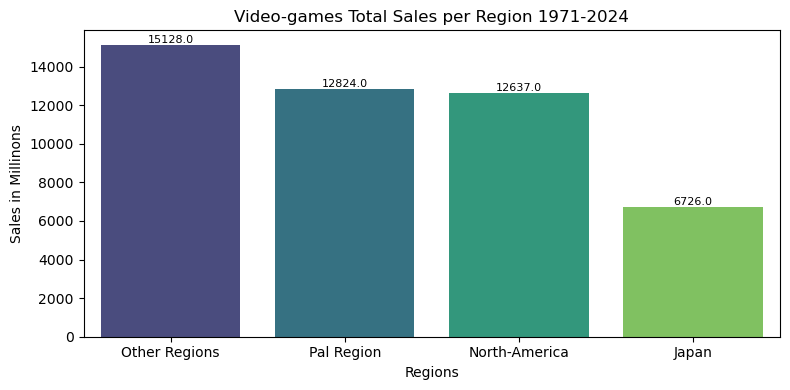

In [50]:
plt.figure(figsize=(8, 4))
regions_bar = sns.barplot(data=distribution_total_sales, x="index", y="total_sales", palette="viridis")
plt.xlabel("Regions")
regions_names = ["Other Regions", "Pal Region", "North-America", "Japan"]
plt.gca().set_xticklabels(regions_names)
plt.ylabel("Sales in Millinons")
plt.title("Video-games Total Sales per Region 1971-2024")

for index, value in enumerate(distribution_total_sales["total_sales"]):
    plt.text(index, value, str(round(value, 2)), va='bottom', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Top-Seller Publishers and Developers</h3>

In [51]:
#Let's look at which publishers and developers have sold the most

top_publishers = df.groupby("publisher")["total_sales"].sum().sort_values(ascending=False).head(20)
top_publishers = top_publishers.reset_index()
top_developers = df.groupby("developer")["total_sales"].sum().sort_values(ascending=False).head(20)
top_developers = top_developers.reset_index()

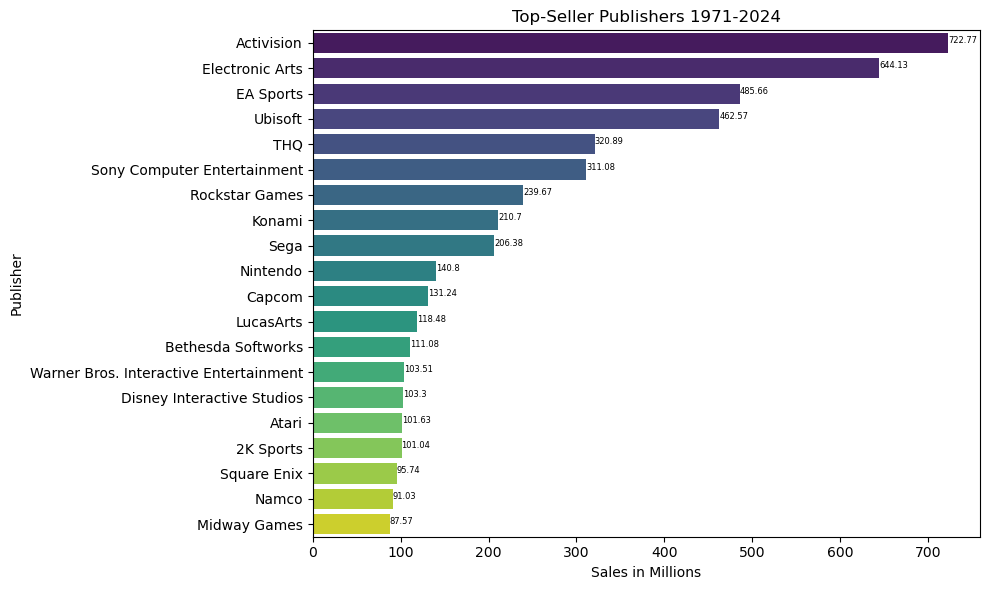

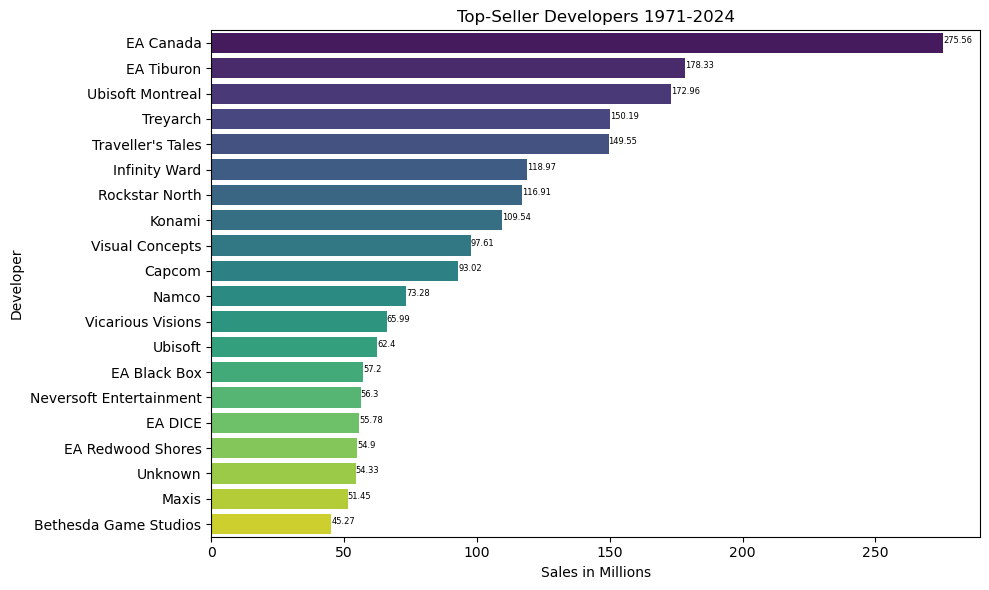

In [52]:
plt.figure(figsize=(10, 6))
publishers_plot = sns.barplot(data=top_publishers, x="total_sales", y="publisher", palette="viridis", 
                           orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
                           order=top_publishers.sort_values('total_sales', ascending=False)['publisher'], linewidth=2)
plt.xlabel("Sales in Millions")
plt.ylabel("Publisher")
plt.title("Top-Seller Publishers 1971-2024")

for index, value in enumerate(top_publishers["total_sales"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=6)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
developers_plot = sns.barplot(data=top_developers, x="total_sales", y="developer", palette="viridis", 
                           orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
                           order=top_developers.sort_values('total_sales', ascending=False)['developer'], linewidth=2)
plt.xlabel("Sales in Millions")
plt.ylabel("Developer")
plt.title("Top-Seller Developers 1971-2024")

for index, value in enumerate(top_developers["total_sales"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=6)
    
plt.tight_layout()
plt.show()

<h2 style="color: #327a81;">Critic Scores</h2>

<h3 style="color: #60b671;">Titles with Best Metacritic Scores by Genre</h3>

In [53]:
# As we did with the most purchased title by genre, let's see which title has the best reviews by genre.
# We will work with the genres_list we obtained before

titles_scores = df.groupby(["title", "genre"])["critic_score"].max().sort_values(ascending=False)

In [54]:
title_genre_critic = pd.DataFrame()

for genre in genres_list:
    genre_critic = df[df["genre"] == genre]
    title_x_critic = genre_critic.groupby(["title", "genre"])["critic_score"].max().sort_values(ascending=False).head(1)
    title_x_critic = title_x_critic.reset_index()
    title_genre_critic = pd.concat([title_genre_critic, title_x_critic])
print(title_genre_critic)

                                               title             genre  \
0              Red Dead Redemption: Undead Nightmare            Action   
0                                    Fusion: Genesis           Shooter   
0            The Legend of Zelda: Breath of the Wild  Action-Adventure   
0                           Tony Hawk's Pro Skater 2            Sports   
0                                   Final Fantasy II      Role-Playing   
0                                Jet Coaster Dream 2        Simulation   
0                                   Super Mario Kart            Racing   
0  Cadence of Hyrule - Crypt of the NecroDancer f...             Music   
0                                          Minecraft              Misc   
0                           The gamrReview Test Game          Fighting   
0                                  Super Mario Bros.          Platform   
0            The Legend of Zelda Collector's Edition         Adventure   
0                                     

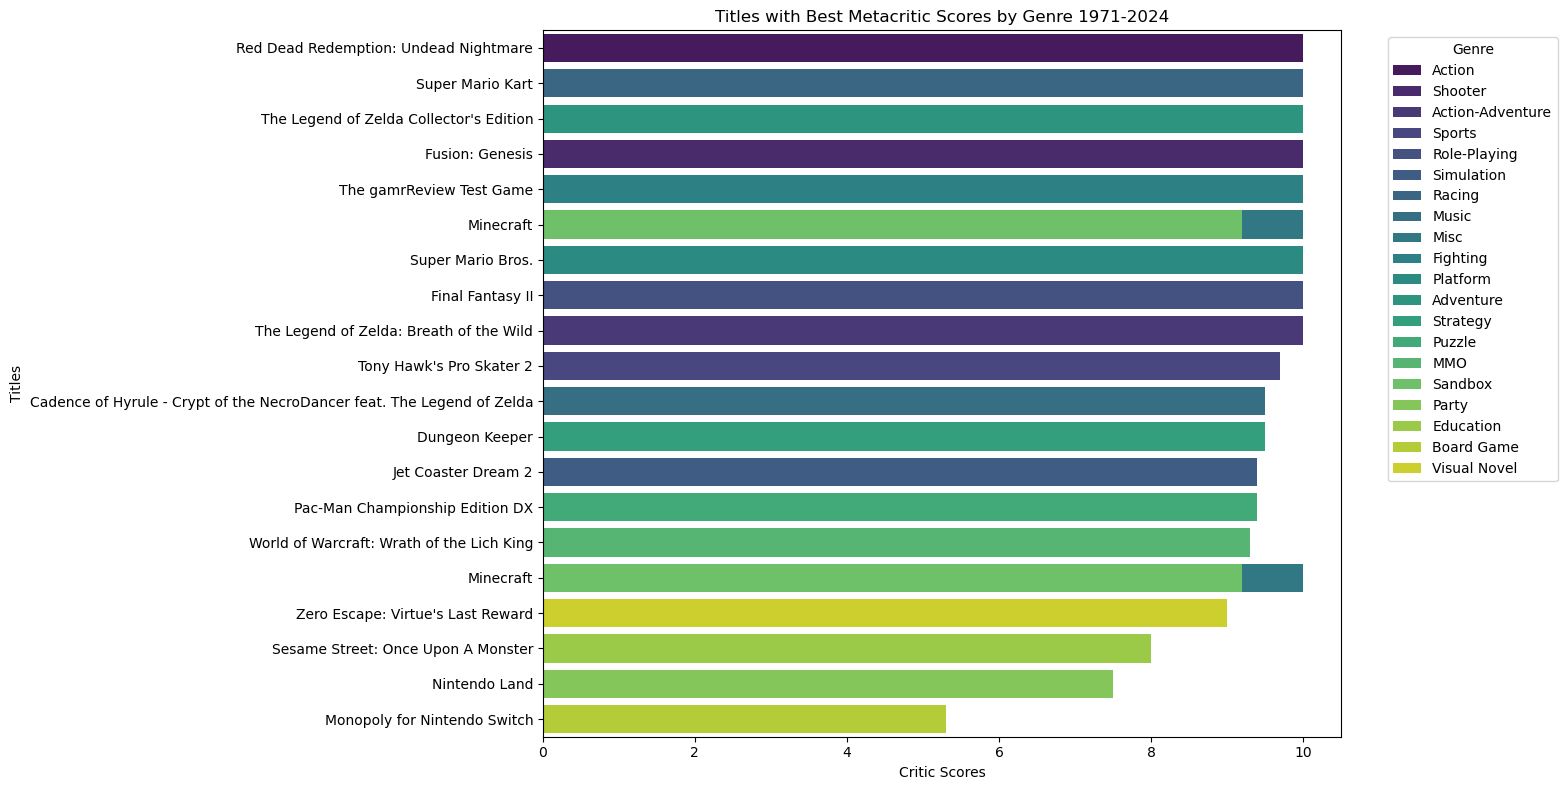

In [55]:
plt.figure(figsize=(16, 8))
title_genre_plot = sns.barplot(data=title_genre_critic, x="critic_score", y="title", hue="genre", palette="viridis", 
            orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum,
            order=title_genre_critic.sort_values('critic_score', ascending=False)['title'], linewidth=2)
plt.xlabel("Critic Scores")
plt.ylabel("Titles")
plt.title("Titles with Best Metacritic Scores by Genre 1971-2024")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Publishers and Developers Metacritic Average Score</h3>

In [56]:
#Let's find the average metacritic score of the top 20 publishers and developers we already obtain

top_publishers_list = top_publishers["publisher"].to_list()
top_developers_list = top_developers["developer"].to_list()

In [57]:
top_developers_list = df[df["developer"].isin(top_developers_list)]
top_publishers_list = df[df["publisher"].isin(top_publishers_list)]

In [58]:
top_publishers_df = top_publishers_list.groupby("publisher")["critic_score"].mean().round(2)
top_publishers_df = top_publishers_df.reset_index()

In [59]:
top_publishers_df.sort_values(by="critic_score", ascending=False, inplace=True)

In [60]:
top_developers_df = top_developers_list.groupby("developer")["critic_score"].mean().round(2)
top_developers_df = top_developers_df.reset_index()

In [61]:
top_developers_df.sort_values(by="critic_score", ascending=False, inplace=True)

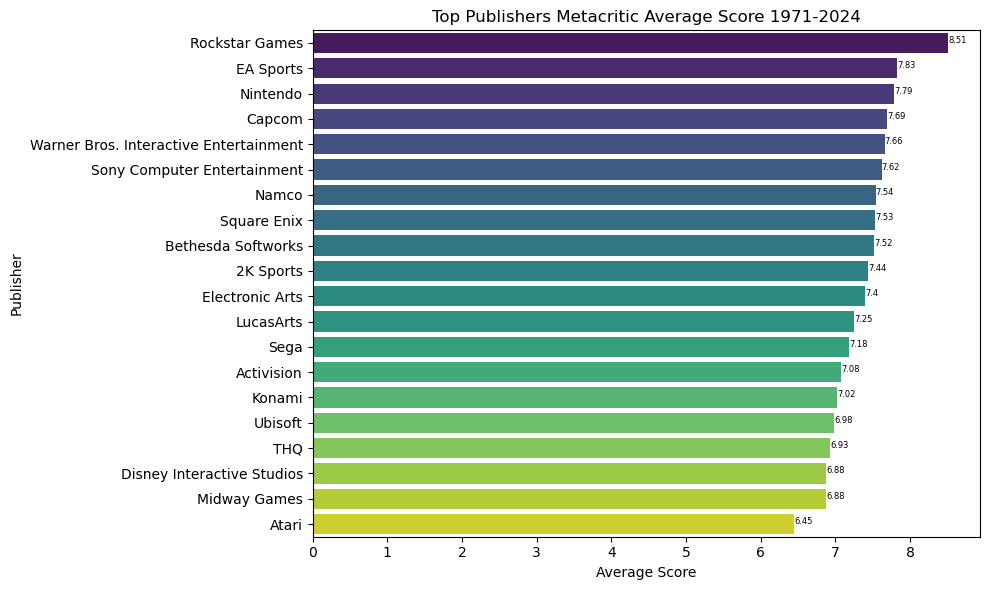

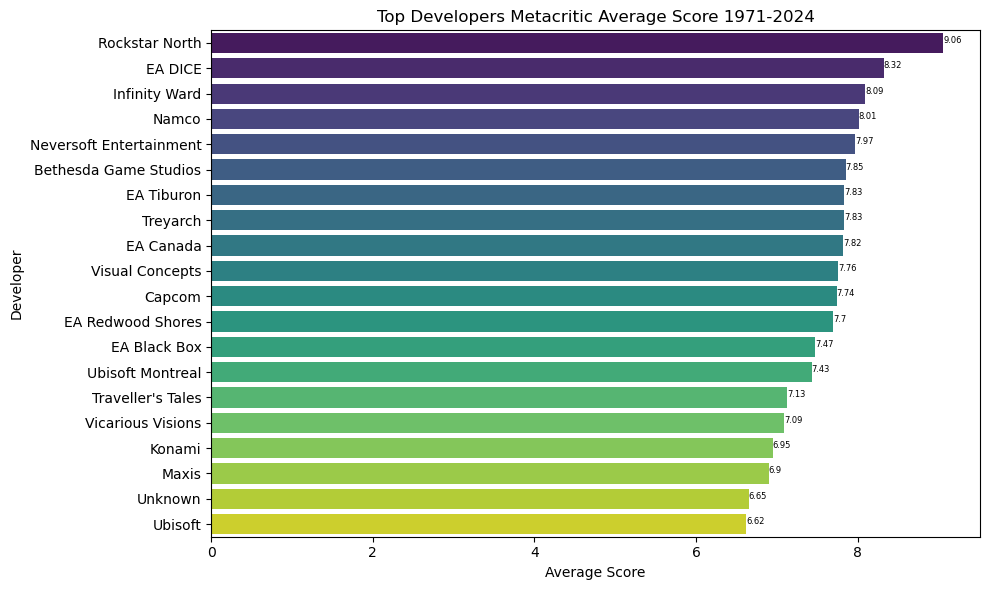

In [62]:
plt.figure(figsize=(10, 6))
publi_avg_plot = sns.barplot(data=top_publishers_df, x="critic_score", y="publisher", palette="viridis", 
                           orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
                           order=top_publishers_df.sort_values("critic_score", ascending=False)["publisher"], linewidth=2)
plt.xlabel("Average Score")
plt.ylabel("Publisher")
plt.title("Top Publishers Metacritic Average Score 1971-2024")

for index, value in enumerate(top_publishers_df["critic_score"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=6)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
dev_avg_plot = sns.barplot(data=top_developers_df, x="critic_score", y="developer", palette="viridis", 
                           orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
                           order=top_developers_df.sort_values("critic_score", ascending=False)["developer"], linewidth=2)
plt.xlabel("Average Score")
plt.ylabel("Developer")
plt.title("Top Developers Metacritic Average Score 1971-2024")

for index, value in enumerate(top_developers_df["critic_score"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=6)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Genres Metacritic Average Score</h3>

In [63]:
genre_scores_df = df.groupby("genre")["critic_score"].mean().round(2).sort_values(ascending=False)

In [64]:
genre_scores_df = genre_scores_df.reset_index()

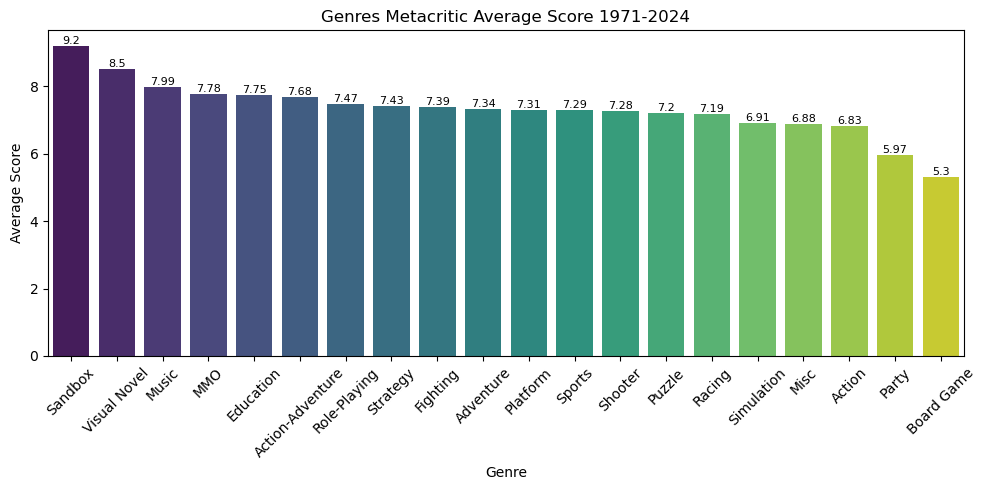

In [65]:
plt.figure(figsize=(10, 5))
genre_avg_plot = sns.barplot(data=genre_scores_df, x="genre", y="critic_score", palette="viridis")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.ylabel("Average Score")
plt.title("Genres Metacritic Average Score 1971-2024")

for index, value in enumerate(genre_scores_df["critic_score"]):
    plt.text(index, value, str(round(value, 2)), va='bottom', ha='center', fontsize=8)
    
plt.tight_layout()
plt.show()

<h1 style="color: #492c68;">02 | Export CSV to New Specific EDA</h1>

In [69]:
df.to_csv("vg_war_data.csv")